# Яндекс. Тренировки по алгоритмам июнь 2021, занятие 1

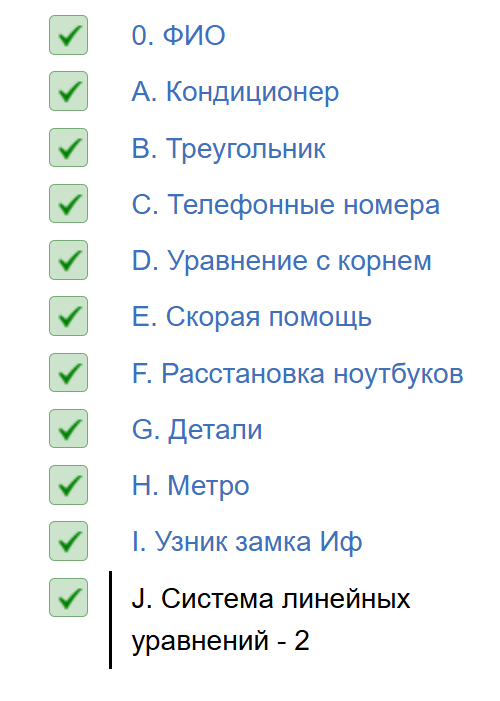

## A. Кондиционер

In [1]:
t_room, t_cond = list(map(int, input().split(' ')))
regime = input()

if regime == 'freeze':
	print(min(t_room, t_cond ))
elif regime == 'heat':
	print(max(t_room, t_cond ))
elif regime == 'auto':
	print(t_cond)
else:
	print(t_room)

20


## B. Треугольник

In [2]:
a = int(input())
b = int(input())
c = int(input())

if all([(a+b>c),(a+c>b),(b+c>a)]):
	print('YES')
else:
	print('NO')

YES


## C. Телефонные номера

In [ ]:
def normalize_phone_number(phone):
    # Убираем все символы, кроме цифр
    digits = ''.join(filter(str.isdigit, phone))
    
    # Если номер начинается с "8" или "+7", преобразуем его в "+7"
    if len(digits) == 11 and digits[0] == '8':
        digits = '7' + digits[1:]
    elif len(digits) == 11 and digits[0] == '7':
        pass  # Номер уже в формате "+7"
    elif len(digits) == 7:  # Если указан только номер, добавляем код 495
        digits = '7495' + digits
    
    # Формируем номер в формате "+7<код><номер>"
    return '+' + digits

# Считываем входные данные
new_number = normalize_phone_number(input().strip())
existing_numbers = [normalize_phone_number(input().strip()) for _ in range(3)]

for i in range(3):
    if existing_numbers[i]==new_number:
        print('YES')
    else:
        print('NO')

## D. Уравнение с корнем

$$
\sqrt{ax+b} = c\\~\\

ax+b = c^2\\~\\

x = \frac{c^2 - b}{a}
$$

In [4]:
a = int(input())
b = int(input())
c = int(input())

if c<0: # Корень не может быть меньше 0
    print('NO SOLUTION')
elif a==0:
    if c**2==b: # При таком раскладе у нас x любой
        print('MANY SOLUTIONS')
    else:  # с^2 != b => нет решений
        print('NO SOLUTION')
else:
    x = (c**2 - b)/a
    if  x.is_integer():
        print(int(x))
    else:
        print('NO SOLUTION')

NO SOLUTION


## E. Скорая помощь

Мы решаем задачу следующим образом. В доме с $M$ этажами и одинаковым числом квартир на каждом этаже в каждом подъезде (при условии, что в каждом подъезде ровно $M \cdot x$ квартир, где $x$ – число квартир на этаже) номер квартиры $K$ однозначно определяет подъезд и этаж по формулам

$$
P=\Bigl(\frac{K-1}{M\cdot x}\Bigr)_{\text{цел}}+1,\qquad
N=\Bigl(\frac{(K-1) \bmod (M\cdot x)}{x}\Bigr)_{\text{цел}}+1.
$$

Нам известны данные по вызову, когда с этого же адреса выезжала скорая помощь – квартира $K_2$ находится в подъезде $P_2$ на этаже $N_2$. Это означает, что при том же $x$ должны выполняться условия
 1. $(P_2-1)\,M\,x\le K_2-1 < P_2\,M\,x,$
 2. Если обозначить $r=K_2-1 - (P_2-1)M\,x$, то $(N_2-1)x\le r < N_2\,x.$

Наша цель – найти все натуральные $x$ (количество квартир на этаже), для которых эти неравенства выполняются, а затем по ним вычислить для квартиры $K_1$ её подъезд $P_1$ и этаж $N_1$. Если полученные варианты $P_1$ (или $N_1$) неоднозначны, вместо числа выводим 0, а если нет ни одного $x$ – печатаем «-1 -1».

Общая идея решения:
1. Разобьём неравенства на два блока. Например, из условия (1) при $P_2=1$ не возникает «левая» граница (так как $(0)\,M\,x\le K_2-1$ всегда), а неравенство $K_2-1 < M\,x$ даёт нижнюю границу $x > \frac{K_2-1}{M}$ (то есть минимальное целое $x$ равно $\lfloor\frac{K_2-1}{M}\rfloor+1$). Если же $P_2>1$ – получаем и нижнюю, и верхнюю границу из условия (1).

2. Аналогично, из условия (2) (запишем $A=(P_2-1)M$):
   - Правое неравенство $K_2-1 < x\,(A+N_2)$ даёт нижнюю границу $x > \frac{K_2-1}{A+N_2}$ (то есть $x\ge \lfloor\frac{K_2-1}{A+N_2}\rfloor+1$).
   - Левое неравенство $(N_2-1)x \le K_2-1 - A\,x$ перепишется как $x\,(A+N_2-1)\le K_2-1$ и даёт верхнюю границу $x\le \lfloor\frac{K_2-1}{A+N_2-1}\rfloor$ (если $A+N_2-1>0$; такое действительно, если $P_2>1$ или $N_2>1$).

3. Особый случай – если $P_2=1$ и $N_2=1$, то условие (2) становится $K_2-1 < x$ (так как левая часть тривиальна) – то есть $x > K_2-1$ и никаких ограничений сверху нет (множество допустимых $x$ бесконечно).

4. После того как мы вычислим нижнюю и (если есть) верхнюю границу для $x$ (назовём их $L$ и $U$; если верхней границы нет, то множество $x$ – бесконечно, но функция для $K_1$ становится ступенчатой и стабилизируется при больших $x$), мы перебираем все допустимые $x$ (если их число конечно, то от $L$ до $U$, а если бесконечно – перебираем $x$ от $L$ до $K_1$ (при $x>K_1-1$ результат для $K_1$ не меняется) и дополнительно один представитель из «хвоста»).

5. Для каждого допустимого $x$ вычисляем по формулам:
$$
P_1=\Bigl(\frac{K_1-1}{M\,x}\Bigr)_{\text{цел}}+1,\qquad
N_1=\Bigl(\frac{(K_1-1) \bmod (M\,x)}{x}\Bigr)_{\text{цел}}+1.
$$
Собираем все полученные пары. Если по некоторой координате (подъезд или этаж) получаем несколько значений – будем выводить 0 вместо числа.

Ниже приведён полный код на Python, который решает задачу.

---

### Пояснение работы решения

1. **Определение ограничений для $x$.**  
   В зависимости от значений $P_2$ и $N_2$ мы получаем нижнюю границу $L$ и (если возможно) верхнюю границу $U$ для $x$. Например, если $P_2=1$ и $N_2>1$, то
   - Из (1): $x > \frac{K_2-1}{M}$ даёт $L_A=\lfloor\frac{K_2-1}{M}\rfloor+1$.
   - Из (2): $x > \frac{K_2-1}{N_2}$ и $x\le \frac{K_2-1}{N_2-1}$.  
   Берём $L=\max(L_A, L_B)$ и $U=\lfloor\frac{K_2-1}{N_2-1}\rfloor$.

2. **Обработка бесконечного множества $x$.**  
   Если $P_2=1$ и $N_2=1$, верхней границы нет. Тогда допустимыми являются все $x\ge \max(\lfloor\frac{K_2-1}{M}\rfloor+1,\,K_2)$. Но поскольку функция, определяющая $P_1$ и $N_1$ для $K_1$, становится постоянной при больших $x$ (точнее, при $x > K_1-1$), для перебора достаточно рассмотреть $x$ до $K_1$ и ещё один представитель из «хвоста».

3. **Перебор вариантов и вывод результата.**  
   Для каждого найденного $x$ вычисляем $P_1$ и $N_1$. Если по одной из координат результат неоднозначен (то есть получено более одного значения) – выводим 0 вместо этого числа. Если ни одного $x$ не существует – печатаем «-1 -1».

In [1]:
def main():
    data = input().split()
    if not data: 
        return
    try:
        K1 = int(data[0])
        M  = int(data[1])
        K2 = int(data[2])
        P2 = int(data[3])
        N2 = int(data[4])
    except:
        return

    # Базовая проверка: этаж вызова должен быть от 1 до M
    if N2 < 1 or N2 > M or P2 < 1 or K1 < 1 or K2 < 1:
        return print("-1 -1")


    # Обозначим A = (P2-1)*M
    A = (P2 - 1) * M

    # Определим допустимые x (количество квартир на этаже)
    # Рассматриваем случаи.
    valid_infinite = False  # если множество x неограничено сверху
    L = None
    U = None  # если U остается None, значит ограничений сверху нет

    if P2 == 1:
        # Из условия (1): K2-1 < M*x  =>  x > (K2-1)/M
        L_A = ((K2 - 1) // M) + 1
        if N2 == 1:
            # Из (2): r = K2-1, и условие r < x дает: x > K2-1  => L_B = K2
            L_B = K2
            U_B = None
        else:
            # N2 > 1:
            L_B = ((K2 - 1) // (N2)) + 1   # т.к. K2-1 < N2*x  => x > (K2-1)/N2
            U_B = (K2 - 1) // (N2 - 1)       # т.к. (N2-1)*x <= K2-1
        L = max(L_A, L_B)
        if N2 == 1:
            U = None  # неограничено сверху
            valid_infinite = True
        else:
            U = U_B
    else:
        # Случай P2 > 1.
        L_A = ((K2 - 1) // (P2 * M)) + 1
        U_A = (K2 - 1) // ((P2 - 1) * M)
        L_B = ((K2 - 1) // (A + N2)) + 1
        # Для U_B: (A+N2-1)*x <= K2-1  => x <= floor((K2-1)/(A+N2-1))
        denom = A + N2 - 1
        if denom > 0:
            U_B = (K2 - 1) // denom
        else:
            U_B = None  # не должно случиться
        L = max(L_A, L_B)
        U = min(U_A, U_B)
    
    # Если множество допустимых x пусто, выводим -1 -1
    if U is not None:
        if L > U:
            print("-1 -1")
            return

    # Теперь вычисляем возможные (P1, N1) для квартиры K1 при допустимых x.
    # По формуле:
    #   P1 = ((K1-1) // (M*x)) + 1,
    #   N1 = (((K1-1) % (M*x)) // x) + 1.
    outcomes_P = set()
    outcomes_N = set()
    
    # Если множество x конечно (U задано), перебираем x от L до U.
    # Если множество бесконечно (случай P2==1 и N2==1), перебираем x от L до x = K1 (если L <= K1)
    # – для x > K1-1 результат для K1 стабилизируется.
    sample_x = []
    if U is not None:
        sample_x = range(L, U+1)
    else:
        if L <= K1:
            sample_x = range(L, K1+1)
        else:
            sample_x = [L]
        sample_x = list(sample_x)
        sample_x.append(max(L, K1) + 1)
    
    for x in sample_x:
        entrance = ((K1 - 1) // (M * x)) + 1
        floor = (((K1 - 1) % (M * x)) // x) + 1
        outcomes_P.add(entrance)
        outcomes_N.add(floor)
    
    # Если по подъезду (P1) или этажу (N1) вариантов несколько – выводим 0 вместо числа.
    res_P = outcomes_P.pop() if len(outcomes_P) == 1 else 0
    res_N = outcomes_N.pop() if len(outcomes_N) == 1 else 0

    print(f"{res_P} {res_N}")

main()

## F. Расстановка ноутбуков

В школе решили на один прямоугольный стол поставить два прямоугольных ноутбука. Ноутбуки нужно поставить так, чтобы их стороны были параллельны сторонам стола. Определите, какие размеры должен иметь стол, чтобы оба ноутбука на него поместились, и площадь стола была минимальна.

Формат ввода
Вводится четыре натуральных числа, первые два задают размеры одного ноутбука, а следующие два — размеры второго. Числа не превышают 1000.

Формат вывода
Выведите два числа — размеры стола. Если возможно несколько ответов, выведите любой из них (но только один).

In [12]:
def minimal_table_size(w1, h1, w2, h2):
    # Функция для вычисления размеров стола
    def calculate_dimensions(orientation1, orientation2):
        w1_, h1_ = orientation1
        w2_, h2_ = orientation2
        
        # Размещение ноутбуков рядом (по горизонтали)
        width_horizontal = w1_ + w2_
        height_horizontal = max(h1_, h2_)
        
        # Размещение ноутбуков друг под другом (по вертикали)
        width_vertical = max(w1_, w2_)
        height_vertical = h1_ + h2_
        
        # Возвращаем оба варианта
        return (width_horizontal, height_horizontal), (width_vertical, height_vertical)
    
    # Все возможные ориентации ноутбуков
    orientations = [
        ((w1, h1), (w2, h2)),  # Оба ноутбука в исходной ориентации
        ((h1, w1), (w2, h2)),  # Первый ноутбук повернут
        ((w1, h1), (h2, w2)),  # Второй ноутбук повернут
        ((h1, w1), (h2, w2))   # Оба ноутбука повернуты
    ]
    
    # Инициализация минимальной площади и размеров стола
    min_area = float('inf')
    best_dimensions = None
    
    # Перебор всех комбинаций
    for orientation1, orientation2 in orientations:
        # Получаем размеры стола для обоих вариантов размещения
        horizontal, vertical = calculate_dimensions(orientation1, orientation2)
        
        # Проверяем горизонтальное размещение
        area_horizontal = horizontal[0] * horizontal[1]
        if area_horizontal < min_area:
            min_area = area_horizontal
            best_dimensions = horizontal
        
        # Проверяем вертикальное размещение
        area_vertical = vertical[0] * vertical[1]
        if area_vertical < min_area:
            min_area = area_vertical
            best_dimensions = vertical
    
    return best_dimensions

# Считываем входные данные
w1, h1, w2, h2 = map(int, input().split())

# Вычисляем минимальные размеры стола
result = minimal_table_size(w1, h1, w2, h2)

# Выводим результат
print(*result)

4 10


## G. Детали

Имеется N кг металлического сплава. Из него изготавливают заготовки массой K кг каждая. После этого из каждой заготовки вытачиваются детали массой M кг каждая (из каждой заготовки вытачивают максимально возможное количество деталей). Если от заготовок после этого что-то остается, то этот материал возвращают к началу производственного цикла и сплавляют с тем, что осталось при изготовлении заготовок. Если того сплава, который получился, достаточно для изготовления хотя бы одной заготовки, то из него снова изготавливают заготовки, из них – детали и т.д. Напишите программу, которая вычислит, какое количество деталей может быть получено по этой технологии из имеющихся исходно N кг сплава.

### Формат ввода
Вводятся N, K, M. Все числа натуральные и не превосходят 200.

### Формат вывода
Выведите одно число — количество деталей, которое может получиться по такой технологии.

In [ ]:
n, k, m = map(int, input().split())
det = 0

while n >= k:  # Пока сплава достаточно для создания хотя бы одной заготовки
    zag = n // k  # Количество заготовок, которые можно сделать
    if zag * (k // m) == 0:
        break
    det += zag * (k // m)  # Добавляем количество деталей, полученных из этих заготовок
    n = n % k + zag * (k % m)  # Обновляем остаток сплава: остаток от деления на k + остатки от всех заготовок

print(det)

## H. Метро

На некоторых кросс-платформенных станциях метро (как, например, «Третьяковская») на разные стороны платформы приходят поезда разных направлений. Таня договорилась встретиться с подругой на такой станции, но поскольку подруга приехала из другого часового пояса, то из-за джетлага сильно проспала, и Тане пришлось долго её ждать. Поезда всегда ходят точно по расписанию, и Таня знает, что поезд стоит на платформе ровно одну минуту, а интервал между поездами (время, в течение которого поезда у платформы нет) составляет a минут для поездов на первом пути и b минут для поездов на втором пути. То есть на первый путь приезжает поезд и стоит одну минуту, затем в течение a минут поезда у платформы нет, затем в течение одной минуты у платформы стоит следующий поезд и т. д.

Пока Таня стояла на платформе, она насчитала n поездов на первом пути и m поездов на втором пути. Определите минимальное и максимальное время, которое Таня могла провести на платформе, или сообщите, что она точно сбилась со счёта.

Все поезда, которые видела Таня, она наблюдала в течение всей минуты, то есть Таня не приходит и не уходит с платформы посередине той минуты, когда поезд стоит на платформе.

### Формат ввода
Первая строка входных данных содержит число a — интервал между поездами на первом пути. Вторая строка содержит число b — интервал между поездами на втором пути. Третья строка содержит число n — количество поездов на первом пути, которые увидела Таня. Четвёртая строка содержит число m — количество поездов на втором пути, которые увидела Таня. Все числа — целые, от 1 до 1000.

### Формат вывода
Программа должна вывести два числа: минимальное и максимальное время в минутах, которое Таня могла стоять на платформе, или одно число -1, если Таня точно ошиблась.

In [ ]:
a = int(input())
b = int(input())
n = int(input())
m = int(input())

mina = (a+1)*(n-1)+1 
maxa = (a+1)*(n-1)+1 + 2*a

minb = (b+1)*(m-1)+1 
maxb = (b+1)*(m-1)+1 + 2*b

mins = max(mina,minb)
maxs = min(maxa,maxb)

if maxs<mins:
    print(-1)
else:
    print(mins,maxs)

-1


## I. Узник замка Иф

За многие годы заточения узник замка Иф проделал в стене прямоугольное отверстие размером D × E. Замок Иф сложен из кирпичей, размером A × B × C. Определите, сможет ли узник выбрасывать кирпичи в море через это отверстие, если стороны кирпича должны быть параллельны сторонам отверстия.

### Формат ввода
Программа получает на вход числа A, B, C, D, E.

### Формат вывода
Программа должна вывести слово YES или NO.

In [37]:
a = int(input())
b = int(input())
c = int(input())
d = int(input())
e = int(input())

if d>=sorted([a,b,c])[0] and e>=sorted([a,b,c])[1]:
    print('YES')
else:
    print('NO')

NO


## J. Система линейных уравнений - 2

Даны числа a, b, c, d, e, f.
Решите систему линейных уравнений:
ax + by = e,
cx + dy = f,

### Формат ввода
Вводятся 6 вещественных чисел - коэффициенты уравнений.

### Формат вывода
Вывод программы зависит от вида решения этой системы.

Если система не имеет решений, то программа должна вывести единственное число 0.

Если система имеет бесконечно много решений, каждое из которых имеет вид y=kx+b,
то программа должна вывести число 1, а затем значения k и b.

Если система имеет единственное решение (x0,y0),
то программа должна вывести число 2,
а затем значения x0 и y0.

Если система имеет бесконечно много решений вида x=x0, y — любое,
то программа должна вывести число 3, а затем значение x0.

Если система имеет бесконечно много решений вида y=y0, x — любое,
то программа должна вывести число 4, а затем значение y0.

Если любая пара чисел (x,y) является решением,
то программа должна вывести число 5.

Числа x0 и y0 будут проверяться с точностью до пяти знаков после точки.


In [68]:
def system_of_equations(a, b, c, d, e, f):
    eps = 1e-9
    def is_zero(x):
        return abs(x) < eps

    # Вычисляем определитель матрицы коэффициентов
    D = a * d - b * c

    # Если определитель не равен нулю – единственное решение.
    if not is_zero(D):
        x = (e * d - b * f) / D
        y = (a * f - e * c) / D
        return [2, f"{x:.5f}", f"{y:.5f}"]

    # D == 0: система либо имеет бесконечно много решений, либо не имеет решений.
    # Если все коэффициенты равны нулю, включая свободные члены, то любое (x, y) подходит.
    if is_zero(a) and is_zero(b) and is_zero(c) and is_zero(d) and is_zero(e) and is_zero(f):
        return [5]

    # Если какое-либо уравнение вида 0*x+0*y = nonzero, то система противоречива.
    if is_zero(a) and is_zero(b) and not is_zero(e):
        return [0]
    if is_zero(c) and is_zero(d) and not is_zero(f):
        return [0]

    # Выберем представительное (ненулевое) уравнение.
    # Если первое уравнение не тривиально, будем его использовать, иначе – второе.
    if not (is_zero(a) and is_zero(b)):
        A, B, E = a, b, e
    else:
        A, B, E = c, d, f

    # Если оба уравнения ненулевые, проверим их пропорциональность.
    if not (is_zero(a) and is_zero(b)) and not (is_zero(c) and is_zero(d)):
        if not is_zero(a):
            t = c / a
            if (not is_zero(d - t * b)) or (not is_zero(f - t * e)):
                return [0]
        elif not is_zero(b):
            t = d / b
            if (not is_zero(c - t * a)) or (not is_zero(f - t * e)):
                return [0]
    
    # Теперь система имеет бесконечно много решений, задаваемых одним уравнением A*x + B*y = E.
    # Определяем вид решения:
    if not is_zero(A) and not is_zero(B):
        # Можно записать в виде: y = k*x + b  (k = -A/B, b = E/B)
        k = -A / B
        b_line = E / B
        return [1, f"{k:.5f}", f"{b_line:.5f}"]
    elif not is_zero(A) and is_zero(B):
        # Уравнение имеет вид A*x = E  => x = E/A, y – произвольное
        return [3, f"{E / A:.5f}"]
    elif is_zero(A) and not is_zero(B):
        # Уравнение имеет вид B*y = E  => y = E/B, x – произвольное
        return [4, f"{E / B:.5f}"]
    
    # Если ни один случай не сработал (теоретически сюда попасть нельзя), возвращаем 0.
    return [0]

def main():
    a, b, c, d, e, f = [float(input()) for _ in range(6)]
    result = system_of_equations(a, b, c, d, e, f)
    print(' '.join(map(str, result)))

main()

[2, '3.00000', '3.00000']

In [67]:
assert system_of_equations(1, 0, 0, 1, 3, 3) == [2, '3.00000', '3.00000']
assert system_of_equations(2, 2, 3, -3, 6, -3) == [2, '1.00000', '2.00000']
assert system_of_equations(1, 1, 1, -1, 3, -1) == [2, '1.00000', '2.00000']
assert system_of_equations(1, 1, 2, 2, 1, 2) == [1, '-1.00000', '1.00000']
assert system_of_equations(1, 1, 1, 1, 1, 2) == [0]
assert system_of_equations(0, 1, 0, 1, 2, 3) == [0]
assert system_of_equations(0, 1, 0, 2, 2, 4) == [4, '2.00000']
assert system_of_equations(1, 0, 2, 0, 2, 4) == [3, '2.00000']
assert system_of_equations(0, 0, 0, 0, 0, 0) == [5]
assert system_of_equations(0, 0, 0, 0, 1, 0) == [0]
assert system_of_equations(0, 2, 0, 4, 1, 2) == [4, '0.50000']
assert system_of_equations(0, 2, 0, 4, 1, 2) == [4, '0.50000']
assert system_of_equations(0, 0, 2, 4, 0, 2) == [1, '-0.50000', '0.50000']
assert system_of_equations(2, 4, 0, 0, 2, 0) == [1, '-0.50000', '0.50000']
assert system_of_equations(2, 0, 3, 0, 2, 3) == [3, '1.00000']
assert system_of_equations(2, 2, 3, 0, 6, 3) == [2, '1.00000', '2.00000']
assert system_of_equations(1, 1, 1.5, 0, 3, 1.5) == [2, '1.00000', '2.00000']